In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
# Load the dataset
df_cab = pd.read_csv('./DataSets/Cab_Data.csv', on_bad_lines = 'skip')
df_city = pd.read_csv('./DataSets/City.csv', on_bad_lines = 'skip')
df_customer = pd.read_csv('./DataSets/Customer_ID.csv', on_bad_lines = 'skip')
df_transaction = pd.read_csv('./DataSets/Transaction_ID.csv', on_bad_lines = 'skip')

In [31]:
# I merged all four files into the big dataset

In [32]:

final_df = pd.merge(df_cab, df_city, on='City', how='left')

In [33]:
final_df = pd.merge(final_df, df_transaction, on = 'Transaction ID', how = 'left')

In [34]:
final_df = pd.merge(final_df, df_customer, on = 'Customer ID', how = 'left')

In [36]:
# Calculate profit of each travel
final_df['Profit'] = final_df['Price Charged'] - final_df['Cost of Trip']


In [60]:
# Check for duplicate rows and missing values across all columns
duplicate_rows = final_df.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")
missing_values = final_df.isnull().sum()
print("Missing values:")
print(missing_values)

Number of duplicate rows: 0
Missing values:
Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Population            0
Users                 0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Profit                0
dtype: int64


In [79]:
print(final_df.describe())

       Transaction ID                 Date of Travel   KM Travelled  \
count    3.593920e+05                         359392  359392.000000   
mean     1.022076e+07  1970-01-01 00:00:00.000042964      22.567254   
min      1.000001e+07  1970-01-01 00:00:00.000042371       1.900000   
25%      1.011081e+07  1970-01-01 00:00:00.000042697      12.000000   
50%      1.022104e+07  1970-01-01 00:00:00.000042988      22.440000   
75%      1.033094e+07  1970-01-01 00:00:00.000043232      32.960000   
max      1.044011e+07  1970-01-01 00:00:00.000043465      48.000000   
std      1.268058e+05                            NaN      12.233526   

       Price Charged   Cost of Trip    Customer ID            Age  \
count  359392.000000  359392.000000  359392.000000  359392.000000   
mean      423.443311     286.190113   19191.652115      35.336705   
min        15.600000      19.000000       1.000000      18.000000   
25%       206.437500     151.200000    2705.000000      25.000000   
50%       386.3

Total Profit by Company:
   Company   Total Profit
  Pink Cab  $5,307,328.32
Yellow Cab $44,020,373.17


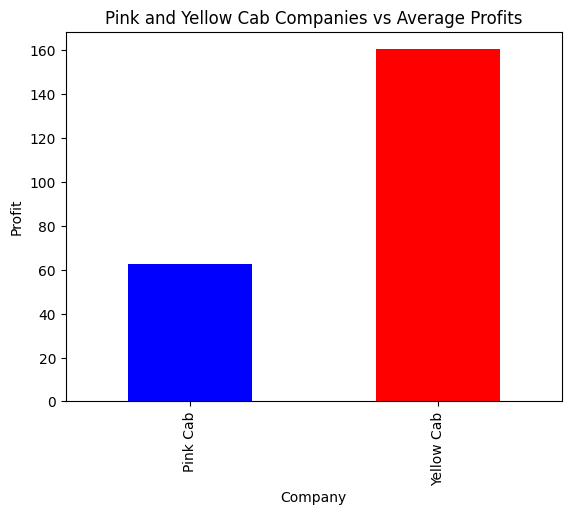

In [69]:
#These categories corresponds to the average profits of these two cabs.
average_profit = final_df.groupby('Company')['Profit'].mean()
average_profit.plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Company')
plt.ylabel('Profit')
plt.title('Pink and Yellow Cab Companies vs Average Profits')
plt.savefig('barplot_comparison_profits.png')

#Total profit of each company
total_profit_by_company = final_df.groupby('Company')['Profit'].sum().reset_index()
total_profit_by_company.columns = ['Company', 'Total Profit']

total_profit_by_company['Total Profit'] = total_profit_by_company['Total Profit'].map('${:,.2f}'.format)

print("Total Profit by Company:")
print(total_profit_by_company.to_string(index=False))

In [88]:

summary_by_year_company = final_df.groupby(['Company']).agg(
    total_rides=('Transaction ID', 'count'),
    total_km_travelled=('KM Travelled', 'sum'),
    total_profit=('Profit', 'sum')
).reset_index()
summary_by_year_company['total_profit'] = summary_by_year_company['total_profit'].map('${:,.2f}'.format)
print("Total Rides, KM Travelled, and Profit by Company and Year:")
print(summary_by_year_company.to_string(index=False))

Total Rides, KM Travelled, and Profit by Company and Year:
   Company  total_rides  total_km_travelled   total_profit
  Pink Cab        84711          1911073.11  $5,307,328.32
Yellow Cab       274681          6199417.47 $44,020,373.17


In [89]:
# Null Hypothesis 1: There is no beneficial difference between the two cab companies
# Alternative Hypothesis 1: It is benefitcial to use one cab company over the other.

# The analysis above investigates the total profit, average profit, total rides, and distance travelled categorized by each cab company.
# All statistics show a significantly higher favor over yellow cab over the pink one, especially when looking at the profit (8 times higher) and average profit (nearly 3 times higher).
# The visual charts and figures reject the null hypothesis and concludes that yellow cab is more profitable than the pink one.

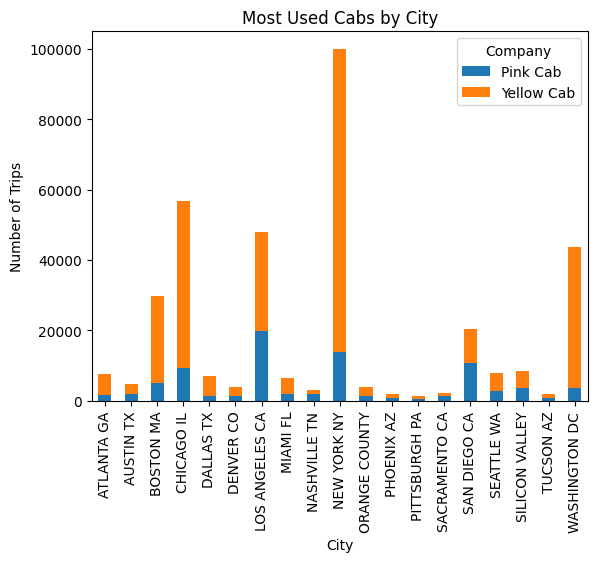

In [87]:
# Each cab type by city
city_company_counts = final_df.groupby(['City', 'Company'])['Company'].count().unstack()

#Then I use the series to plot the bar chart for showing number of trips.
city_company_counts.plot(kind='bar', stacked=True)
plt.xlabel('City')
plt.ylabel('Number of Trips')
plt.title('Most Used Cabs by City')
plt.legend(title='Company')
#saving the image as png
plt.savefig('bar_city_company.png')
#providing the output of the graph image
plt.show()

Heihgt:  1511474.388
Heihgt:  1125732.065
Heihgt:  193766.353
Heihgt:  318722.488
Heihgt:  262001.698
Heihgt:  637889.769
Heihgt:  340250.531
Heihgt:  24730.112
Heihgt:  96050.076
Heihgt:  162301.191
Heihgt:  26451080.7712
Heihgt:  3285976.5807999996
Heihgt:  3299103.8087999998
Heihgt:  3068590.9255999997
Heihgt:  1506717.572
Heihgt:  949273.7016
Heihgt:  976454.7427999999
Heihgt:  1104003.1531999998
Heihgt:  746382.8055999998
Heihgt:  596000.0532000002


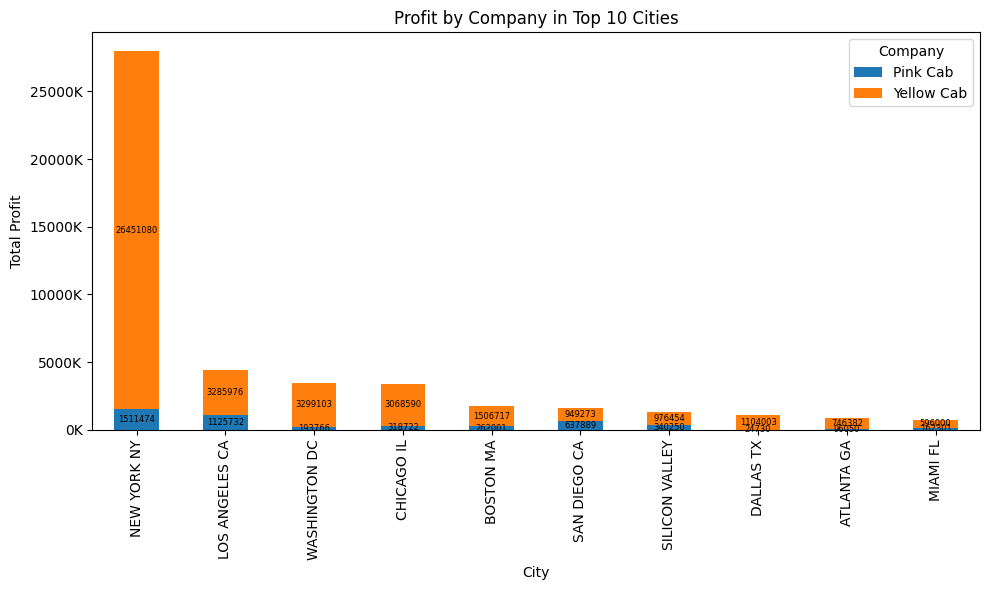

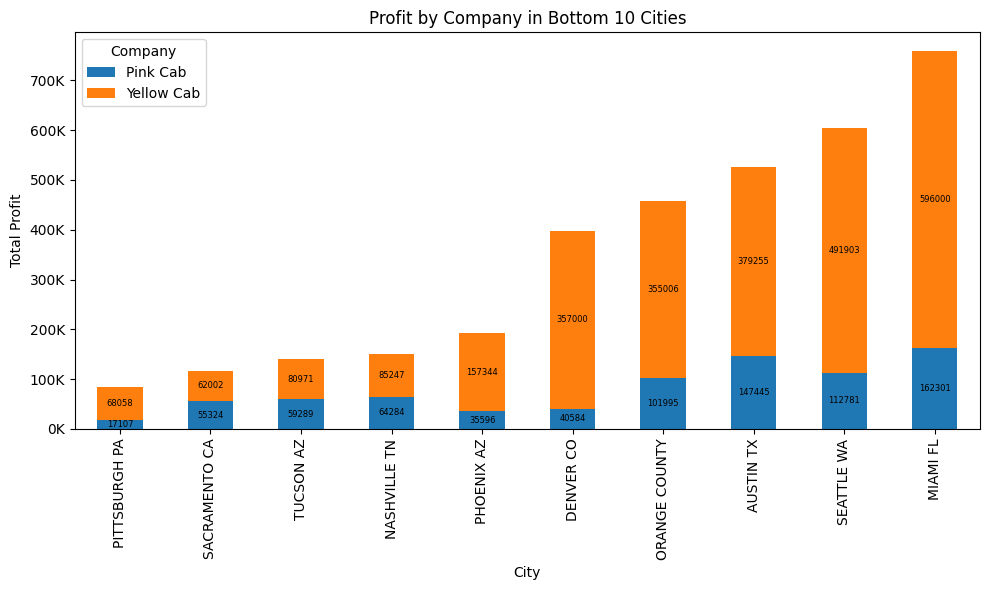

In [204]:
import matplotlib.ticker as ticker

# Group by city and company to get total profit per company per city
profit_by_city_company = final_df.groupby(['City', 'Company'])['Profit'].sum().unstack()

# Sort cities by total profit
total_profit_per_city = profit_by_city_company.sum(axis=1)
profit_big_cities = profit_by_city_company.loc[total_profit_per_city.sort_values(ascending=False).index[:10]]
profit_small_cities = profit_by_city_company.loc[total_profit_per_city.sort_values(ascending=True).index[:10]]

# --- Big cities ---
ax = profit_big_cities.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))
plt.xlabel('City')
plt.ylabel('Total Profit')
plt.title('Profit by Company in Top 10 Cities')
plt.legend(title='Company')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    print("Heihgt: ", height)
    x, y = p.get_xy()
    if height > 1200000:
        ax.text(x + width/2, y + height/2, f'{int(height)}', ha='center', va='center', color='black', fontsize=6)
plt.tight_layout()
plt.savefig('profit_by_company_big_city.png')
plt.show()

# --- Small cities ---
ax2 = profit_small_cities.plot(kind='bar', stacked=True, figsize=(10, 6))
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))
plt.xlabel('City')
plt.ylabel('Total Profit')
plt.title('Profit by Company in Bottom 10 Cities')
for p in ax2.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if height > 50:
        ax2.text(x + width/2, y + height/2, f'{int(height)}', ha='center', va='center', color='black', fontsize=6)
plt.legend(title='Company')
plt.tight_layout()
plt.savefig('profit_by_company_small_city.png')
plt.show()


In [104]:
more_profitable = (profit_by_city_company['Yellow Cab'] > profit_by_city_company['Pink Cab'])
is_always_more_profitable = more_profitable.all()
print("Is Pink Cab always more profitable?", is_always_more_profitable)


Is Pink Cab always more profitable? True


In [105]:
# Null Hypothesis 2: There is no significant difference Yellow Cab anad Pink Cab across cities
# Alternative Hypothesis 2: Yellow Cab generates higher total profit than Pink Cab in every city.
# The bar chart comparing the most used cars by city shows the dominant figures over the pink one, although not yet visually confident in cities like Pittsburgh or Tucson, in most cities.
# A closer insight into two following charts compared the profit by each company in cities with most and least profits showw that very significant proportion of the profit made comes from yellow cab.
# In every city analyzed, Yellow Cab Profit > Pink Cab profit.
# Therefore, it is confident that yellow cab company is profitable than pink one in every city.

In [106]:
final_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Profit,Year
0,10000011,1970-01-01 00:00:00.000042377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",29290,Card,Male,28,10813,57.3150,1970
1,10000012,1970-01-01 00:00:00.000042375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",27703,Card,Male,27,9237,23.6660,1970
2,10000013,1970-01-01 00:00:00.000042371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,"814,885","24,701",28712,Cash,Male,53,11242,27.5680,1970
3,10000014,1970-01-01 00:00:00.000042376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,"814,885","24,701",28020,Cash,Male,23,23327,25.7980,1970
4,10000015,1970-01-01 00:00:00.000042372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,"814,885","24,701",27182,Card,Male,33,8536,16.8440,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,1970-01-01 00:00:00.000043108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,"418,859","127,001",52392,Cash,Male,24,15651,5.8800,1970
359388,10440104,1970-01-01 00:00:00.000043104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,"418,859","127,001",53286,Cash,Male,32,6528,6.9020,1970
359389,10440105,1970-01-01 00:00:00.000043105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,"418,859","127,001",52265,Cash,Male,56,7966,87.4200,1970
359390,10440106,1970-01-01 00:00:00.000043105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,"418,859","127,001",52175,Card,Male,32,6423,32.1420,1970


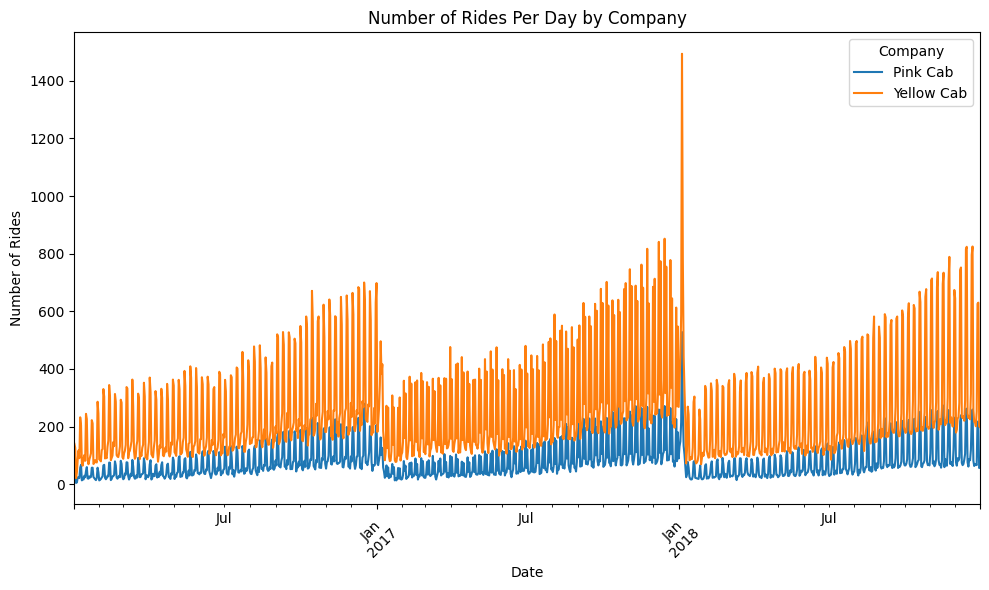

In [140]:
# Calculate rides per day by each company
rides_per_day_company = final_df.groupby(['Date of Travel', 'Company']).size()
rides_per_day_company_unstacked = rides_per_day_company.unstack(fill_value=0)

rides_per_day_company_unstacked.plot(kind='line', figsize=(10, 6))
plt.title('Number of Rides Per Day by Company')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Company')
plt.savefig('number_of_rides_per_day_year.png')
plt.show()



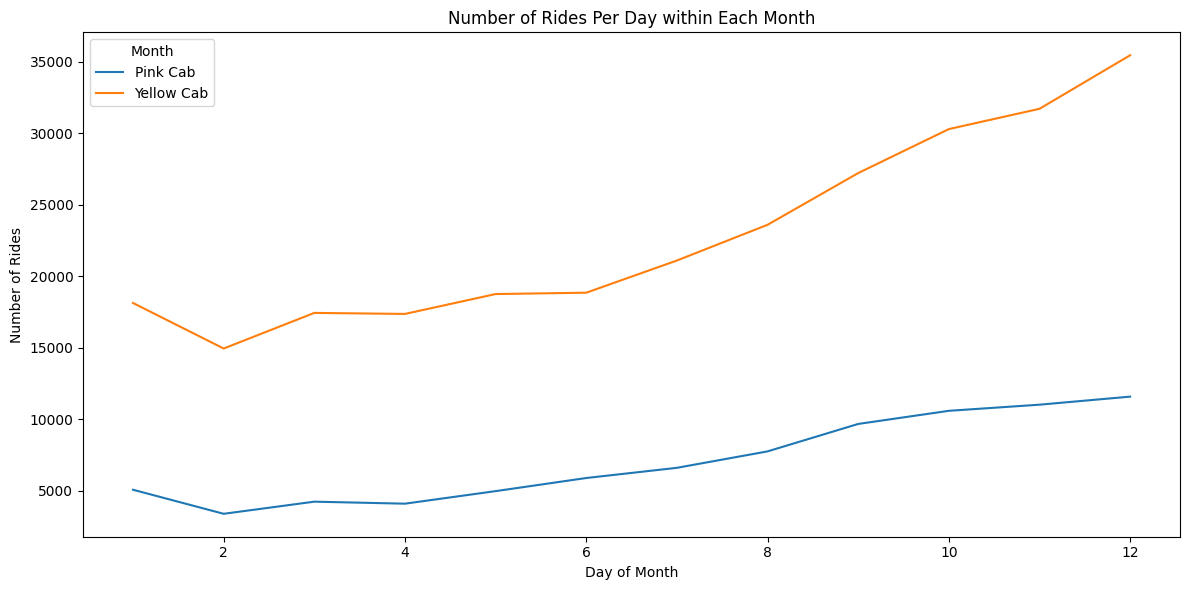

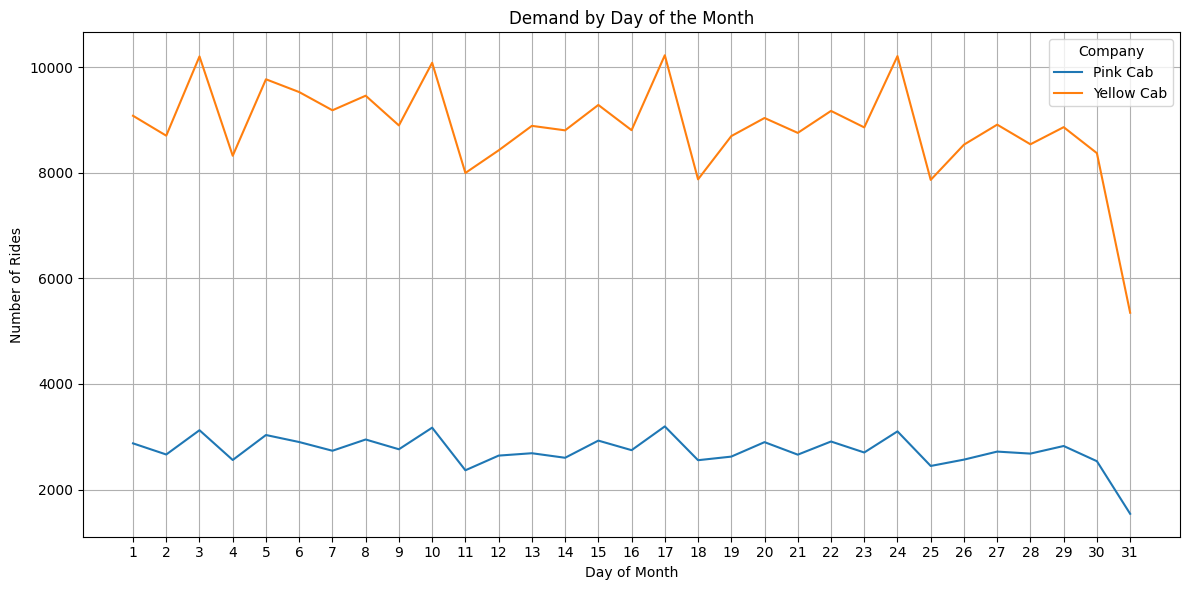

In [142]:
# Extract rides per day and per month for each company
final_df['Month'] = final_df['Date of Travel'].dt.month
final_df['Day'] = final_df['Date of Travel'].dt.day
rides_per_day_within_month = final_df.groupby(['Month', 'Company']).size()
rides_per_day_within_month = rides_per_day_within_month.unstack(fill_value=0)

# Plot line chart for rides_per_month
plt.figure(figsize=(12, 6))
for company in rides_per_day_within_month.columns:
    rides_per_day_within_month[company].plot(kind='line', label=company)
plt.title('Number of Rides Per Day within Each Month')
plt.xlabel('Day of Month')
plt.ylabel('Number of Rides')
plt.tight_layout()
plt.legend(title='Month')
plt.savefig('number_of_rides_per_day_month.png')
plt.show()
#Plot line charat for rides per day within a month
# Group by 'Day' and 'Company' and count the rides
rides_per_day_company = final_df.groupby(['Day', 'Company']).size().unstack()

# Plot the line chart
plt.figure(figsize=(12, 6))
for company in rides_per_day_company.columns:
    rides_per_day_company[company].plot(kind='line', label=company)

plt.title('Demand by Day of the Month')
plt.xlabel('Day of Month')
plt.ylabel('Number of Rides')
plt.xticks(range(1, 32))  # Ensure all days are shown on x-axis
plt.grid(True)
plt.legend(title='Company')
plt.tight_layout()
plt.savefig('number_of_rides_per_day.png')
plt.show()

In [139]:
# Null Hypothesis 3: There is no fluctuation in the travelling habit within the year.
# Alternative Hyppothesis 3: Travelling demands fluctuates seasonally within the year.

# The first line chart compares the rides of per day for each company within the time period between 2016-1018 suggests the constant increase trend within the year in both companies.
# Looking closer to the travelling trend of each company by each month, both cabs follows the generally increasing trend with the low peak in February and high peak in December.
# The line charts, therefore, suggest the higher demand for travelling at the later end of the  year and follows the similar patterns throughout years.

# Null Hypothesis 4: There is no discernable change in the number of rides everyday.
# Alternative Hypothesis 4: There is a fluctuation in the demand for rides everyday.
# The line graph showing the trend of the demand of rides by day of the month shows the continuous fluctuation in the demand for both companies to travel.
# The line graph also suggests the repetitive pattern of travelling within the week in which the highest demand falls into the third day of the week, and plummets on the weekends.
# Therefore, there is a cyclic pattern of the ride demand fluctuation by each day within the month.

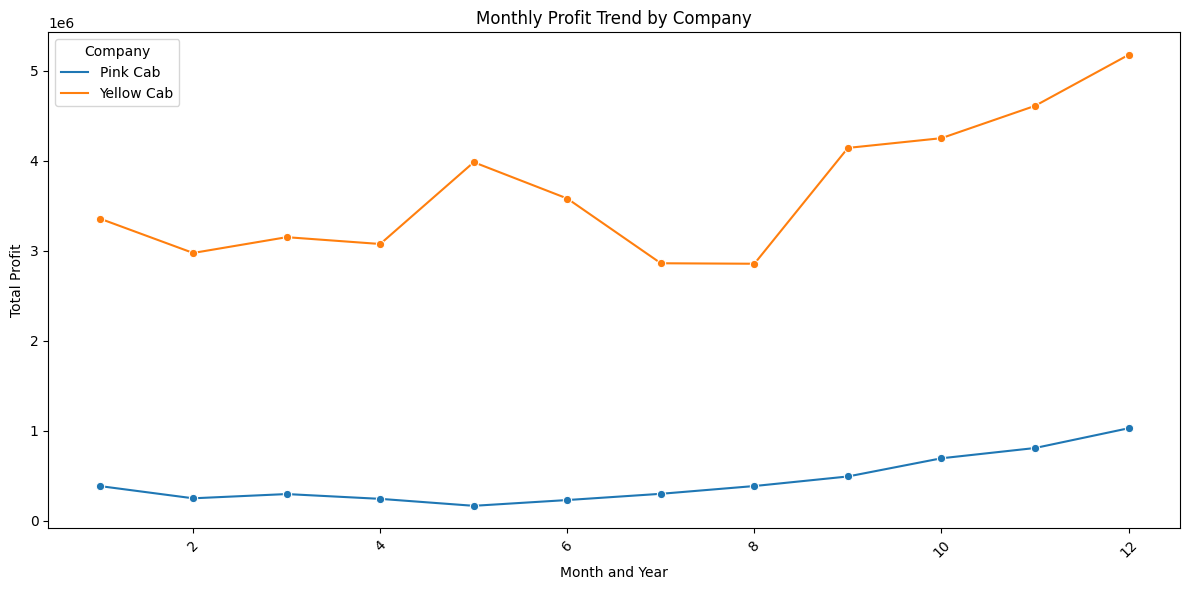

In [195]:

# Group by 'Company' and 'YearMonth' and sum the 'Profit'
profit_by_company_month = final_df.groupby(['Company', 'Month'])['Profit'].sum().reset_index()

#Visualize the Profit Trends

# Line plot to show profit trends over time for each company
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='Month',
    y='Profit',
    hue='Company',
    marker='o',
    data=profit_by_company_month
)  # Using seaborn for a more appealing plot
plt.title('Monthly Profit Trend by Company')
plt.xlabel('Month and Year')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.savefig('profit_trend.png')
plt.tight_layout()
plt.show()

In [150]:
# Null Hypothesis 5: There is no difference in the profit made by each month.
# Alternative Hypothesis 5: There is fluctations in the profit made in different months.

# The line chart showing the monthly profit trend by company shows that while the pink cab company has a steady increasing profit trend, yellow cab's profit fluctuates throughout the year.
# Both pink and yellow companies reach its profit peak at the end months of the year.
# Yellow cab has a outlier fluctuation in May, with nearly equivaalent profit as in September.
# Therefore, the profit fluctuates throughout the year, with the most profitable months fall between October - December or May.

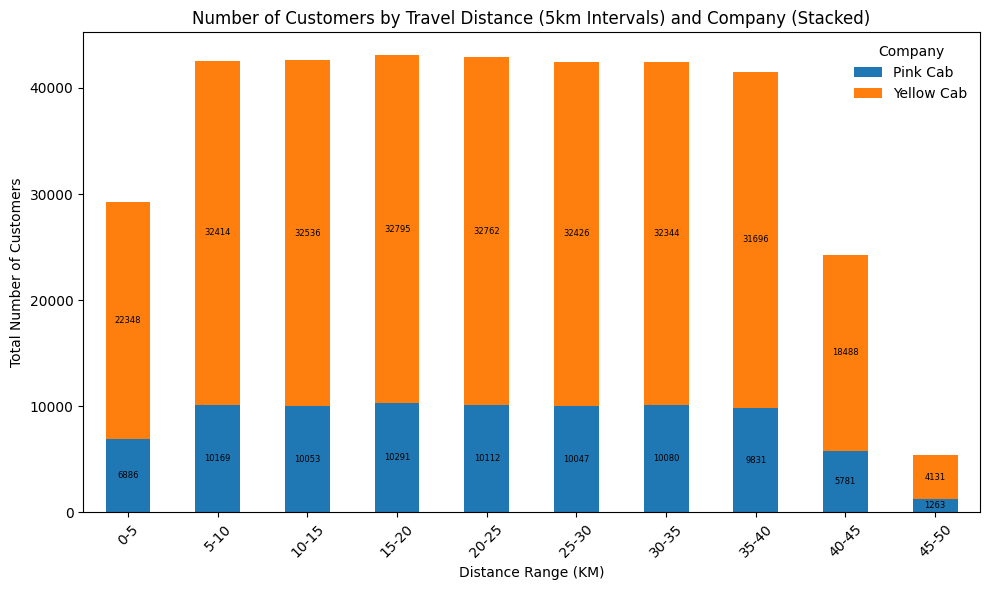

In [190]:
# Group by distance travelled of each customer by each company
customer_distance_company = final_df.groupby(['Company', 'KM Travelled'])['Customer ID'].nunique().reset_index()
customer_distance_company.rename(columns={'Customer ID': 'Number of Customers'}, inplace=True)

# Group by 5-km distance range bins
bins = list(range(0, int(customer_distance_company['KM Travelled'].max()) + 6, 5))  # Bins every 5 km
labels = [f'{i}-{i+5}' for i in bins[:-1]]
customer_distance_company['Distance Bin'] = pd.cut(customer_distance_company['KM Travelled'], bins=bins, labels=labels, right=False)

#Group by Company and Distance Bin and Sum Customer Counts
customer_distance_bin_company = customer_distance_company.groupby(['Company', 'Distance Bin'])['Number of Customers'].sum().reset_index()

#Plot the Grouped Bar Chart

pivot_df = customer_distance_bin_company.pivot(index='Distance Bin', columns='Company', values='Number of Customers').fillna(0)
ax = pivot_df.plot(kind='bar', stacked=True, figsize = (10,6))

plt.title('Number of Customers by Travel Distance (5km Intervals) and Company (Stacked)')
plt.xlabel('Distance Range (KM)')
plt.ylabel('Total Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Company', framealpha=0)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width/2, y + height/2, f'{int(height)}', ha='center', va='center', color='black', fontsize=6)
plt.savefig('customer_traveled distance.png')
plt.tight_layout()
plt.show()

Average Profit per KM by Company:
      Company  Profit_per_KM
0    Pink Cab       2.769908
1  Yellow Cab       7.105508


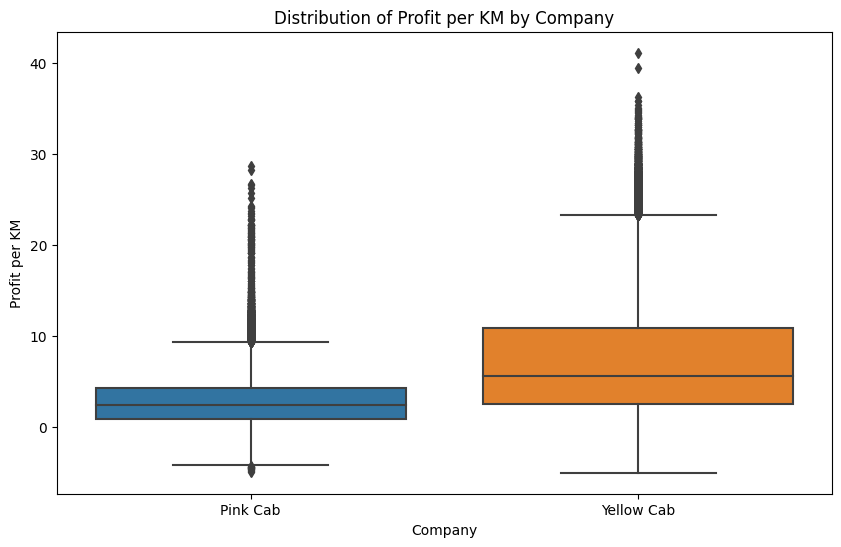

In [193]:
# Calculate Profit per KM (handling potential division by zero)
final_df['Profit_per_KM'] = final_df.apply(
    lambda row: row['Profit'] / row['KM Travelled'] if row['KM Travelled'] != 0 else 0,
    axis=1
)

# Calculate Average Profit per KM for Each Company
average_profit_per_km_by_company = final_df.groupby('Company')['Profit_per_KM'].mean().reset_index()

print("Average Profit per KM by Company:")
print(average_profit_per_km_by_company)

#Distribution of Profit per KM for Each Company
plt.figure(figsize=(10, 6))
sns.boxplot(x='Company', y='Profit_per_KM', data=final_df)  # Using the original df for distribution
plt.title('Distribution of Profit per KM by Company')
plt.xlabel('Company')
plt.ylabel('Profit per KM')
plt.savefig('Avg_Profit_per_km.png')
plt.show()

In [172]:
# Null Hypothesis 6: There is an equal distribution of customers regardless of the distance range.
# Alternative Hypothesis 6: There are changing distributions of customers regardless of the distance range.

# The stacked bar chart shows the steady customer counts (~32,000 for yellow cab and ~10,000 for pink cab) for customers travelling between 5-40 km.
# For very short distance (<5km) or long distances (40-50km), customers are around four times likely to use yellow cab than pink cab.
# Per km travelled, yellow cab gains double or triple the profit than the pink cab.

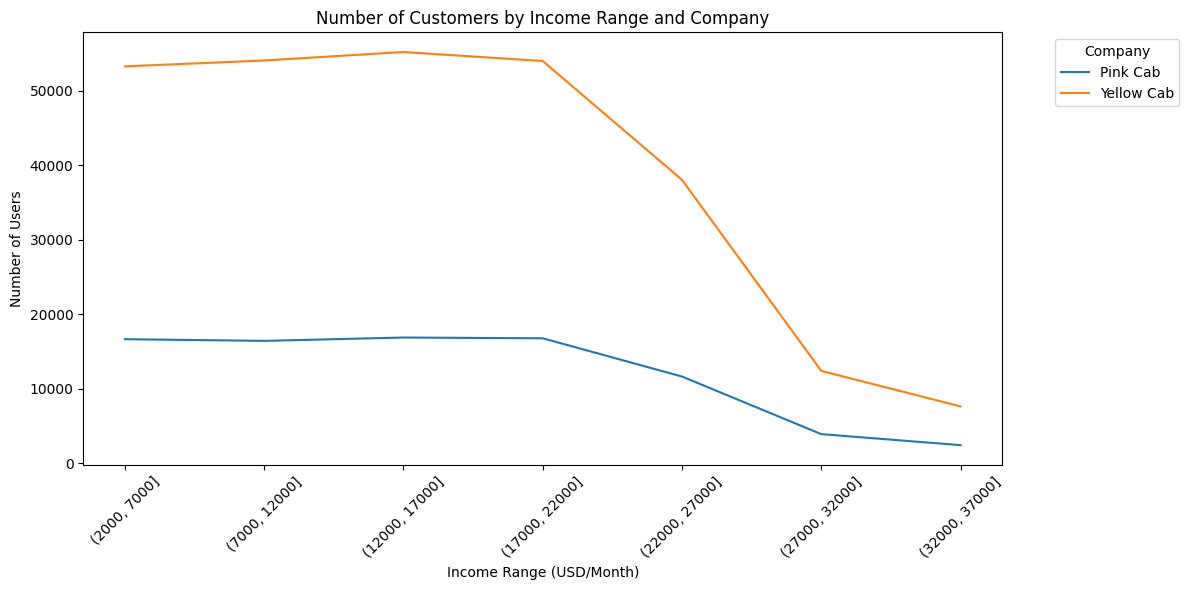

In [191]:
# Plot the realtionship between customer income and number of customers by each company
# Create income bins (you can adjust the bin size)
bins = range(int(final_df['Income (USD/Month)'].min()), int(final_df['Income (USD/Month)'].max()) + 5000, 5000)
final_df['IncomeBin'] = pd.cut(final_df['Income (USD/Month)'], bins=bins)

income_company_counts = final_df.groupby(['IncomeBin', 'Company']).size().unstack(fill_value=0)
ax = income_company_counts.plot(kind='line', figsize=(12, 6))
plt.title('Number of Customers by Income Range and Company')
plt.xlabel('Income Range (USD/Month)')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('customer_income.png')
plt.show()


In [196]:
# Perform t-test to see the difference of income level of customers in two companies
from scipy.stats import ttest_ind

# Filter income by company
yellow_income = final_df[final_df['Company'] == 'Yellow Cab']['Income (USD/Month)']
pink_income = final_df[final_df['Company'] == 'Pink Cab']['Income (USD/Month)']

# Perform t-test (Welch’s version: assumes unequal variance)
t_stat, p_value = ttest_ind(yellow_income, pink_income, equal_var=False)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.2f}")


T-statistic: -0.426
P-value: 0.67


In [186]:
# Null hypothesis 7: The average customer income is the same between the companies.
# Alternative Hypothesis 7: The average customer income is different between the companies.
# The t-test analysis to compare customer income between Yellow Cab and Pink Cab shows p = 0.67 > 0.05. So we fail to reject thee null hypothesis and indicate both compaanies have the similar income-level ccustomers.
# The line chart shows the similar decreasing trend in the number of users as the income level increases. 
# The sharp decline happens when the income surpasses 22,000 USD/ Month, suggesting the target group of customers around 2,000 - 22,000 income for both companies.

# EDA Recommendations

In [194]:
# The performed analyses recommends the Yellow Cab over the Pink Cab for the following reasons:
# 1. Yellow Cab has higher figures in terms of customers and profits than Pink Cab (around 4 times higher regarding number of customers, travelled distance, and average profit; around 8 times higher in terms of the total profit)
# 2. Yellow Cab is far more popular in every cities analyzed, especially in big cities with high population and users.
# 3. Yellow Cab has better flow of customers throughout the years, months, and days.
# 4. The travelling demand for Yellow Cab doubles that of Pink Cab, with the highest demand between October - December or May.
# 5. Customers are four times likely to use Yellow Cab than Pink Cab, with double to triple profits gained for each km run by the former.
# 6. Most customers fall between the income range of 2,000-22,000. However, there needs to be more data to conclude the difference in the income level of the customers between two companies.
# On the basis of the total profits and customer's attraction, though, we will recommend Yellow Cab for investment.